# Part 7 - Model Comparison
Let's load and compare the models we trained in the previous notebook. 

In [1]:
from os import path
import time
import pickle
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
data_dir = './data'
df = pd.read_csv(path.join(data_dir, 'data_clean_engineered.csv'))
features = [feature for feature in df.columns if feature != 'price']
X = df[features]
y = df['price']

In [8]:
def load_models(model_dir: str) -> list:
    """
    Load all models from a directory
    Args:
        model_dir: path to model dir containing .pkl files
    Returns:
        list: list of models
    """
    model_filenames = glob.glob(path.join(model_dir, '*.pkl'))
    models = []
    for filename in model_filenames:
        # skip the simple linear model
        if path.basename(filename) == 'simple_linear.pkl':
            continue
        with open(filename, 'rb') as f:
            model = pickle.load(f)
            models.append(model)
    return models
model_dir = './models'
models = load_models(model_dir=model_dir)

Get some brand new data from https://www.zillow.com/homes/for_sale/San-Francisco-CA/

In [10]:
# try brand new data
actual_price = '$1,300,000'
sqft = 880
bed = 1
bath = 1
property_type = 'condo'
postal_code = '94105'
new_data = {'sqft': sqft,
            'bed': bed,
            'bath': bath,
            'property_type_{}'.format(property_type): 1,
            'postal_code_{}'.format(postal_code): 1
           }
new_df = pd.get_dummies(pd.DataFrame(data=[new_data], columns=X.columns).fillna(0))

for model in models:
    predicted_price = model.predict(new_df)
    print("method: {}".format(model.__class__))
    print("predicted price: ${}M".format(predicted_price[0]/1e6))

print("\nactual price: {}".format(actual_price))

method: <class 'sklearn.linear_model.coordinate_descent.ElasticNet'>
predicted price: $1.5066987169751465M
method: <class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>
predicted price: $1.1404686432106659M
method: <class 'xgboost.sklearn.XGBRegressor'>
predicted price: $1.00533675M
method: <class 'sklearn.kernel_ridge.KernelRidge'>
predicted price: $1.23432M

actual price: $1,300,000


## Ensembling 
We can combine the results from many models to get a more accurate prediction

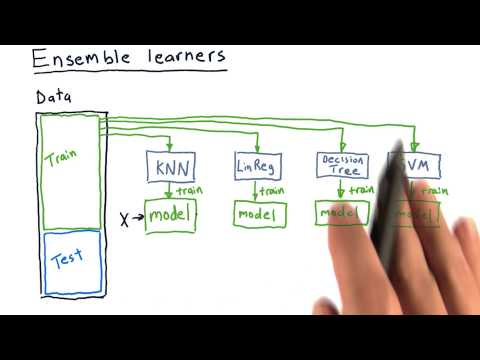

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo(id='Un9zObFjBH0')

In [12]:
def avg_prediction(models: list) -> float:
    """Get average prediction from a list of models"""
    predictions = []
    for model in models:
        predictions.append(model.predict(new_df))
    predictions = np.array(predictions) # convert to numpy array
    return np.average(predictions)

In [13]:
avg_pred = avg_prediction(models)
print(f"average predicted price: ${avg_pred/1e6}M")

average predicted price: $1.221706027546453M
